In [2]:
##Find borders
import numpy as np

##Save nuc34
nuc34=np.load('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1_nuc34.npy')

In [4]:
nuc34[1]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

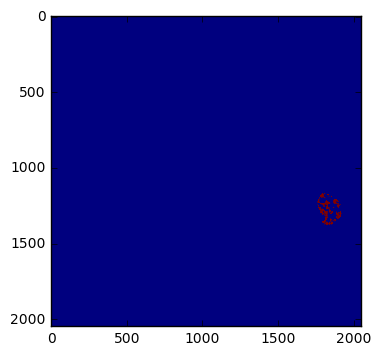

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

z=1

mini_nuc34=nuc34[:,1100:1400,1700:2000]

plt.imshow(nuc34[z])

In [6]:
## Process binary array frame by frame:
from scipy.ndimage import morphology

def fill_nuc(array):
    stack=np.zeros_like(array)
    for z, frame in enumerate(array):
        blob=morphology.binary_dilation(frame, np.ones((20,20)))
        filled_blob=morphology.binary_fill_holes(blob).astype(int)
        reduced=morphology.binary_erosion(filled_blob, np.ones((20,20)))
        stack[z] = reduced
    return stack

In [7]:
nuc34_full=fill_nuc(nuc34)

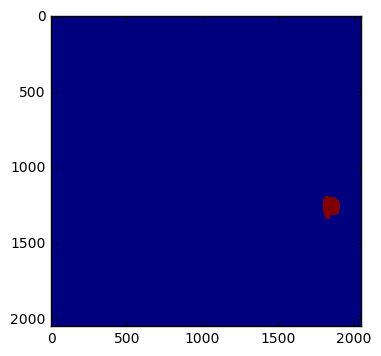

In [12]:
z=20

plt.imshow(nuc34_full[z])

In [70]:
from skimage import feature

edges1 = feature.canny(nuc34_full[1], 1)
edges1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

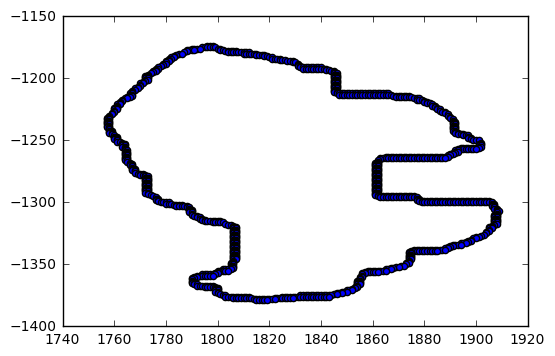

In [85]:
#Convert array to (row, column) coordinates 
rc=edges1.nonzero()

#Sense check, column = rc[1], row == rc[0], but is negative as image origin is top left
plt.scatter(rc[1],-rc[0])

In [91]:
#Reshape to a list of coordinates     --ERRORS!
edge_list=np.reshape(rc, (:,2))

SyntaxError: invalid syntax (<ipython-input-91-01702a9df95c>, line 2)

In [90]:
edge_list

array([-1174, -1174, -1174, ..., -1379, -1379, -1379], dtype=int64)

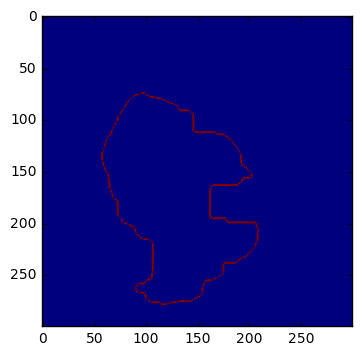

In [32]:
plt.imshow(edges1[1100:1400,1700:2000])

In [56]:
poly_list = measure.approximate_polygon(edge_list, 3)
#poly_list

poly_row=poly_list[:,0]
poly_column=poly_list[:,1]

poly = np.zeros_like(nuc34_full[1])
poly[poly_row, poly_column]=True

#poly1 = np.ravel(poly_list, 'C')
#poly1

In [66]:
poly_list.shape

(377L, 2L)

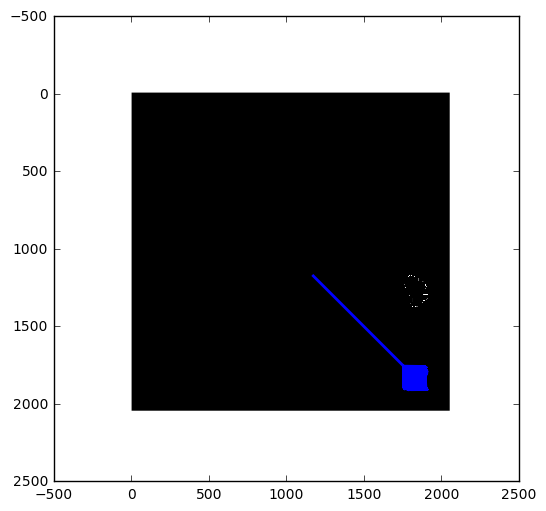

In [78]:
##Not the way to do this
fig, (ax2) = plt.subplots(figsize=(6, 6))

plt.gray()

ax2.imshow(edges1)

##Plot from Coordinates - note
ax2.plot(poly_list[:, 1], poly_list[:, 0], '-b', linewidth=2)

plt.show()

In [76]:
##Find 3D surface
from skimage import measure

sf=boarder = measure.block(nuc34_full, 1)

TypeError: 'module' object is not callable

In [20]:
import skimage
skimage.__version__

'0.12.3'